# **Installing require Tools**

In [51]:
pip install gradio

#**Import the Libraries**

In [53]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import gradio as gr

#**Data Collecction**

In [3]:
# Loading the dataset into a pandas DataFrame
wine_data = pd.read_csv('winequality-red.csv')  # Use this to identify issues

In [4]:
# Display the first few rows
print("First 5 rows of the dataset:")
wine_data.head()


First 5 rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Checking the shape of the dataset
wine_data.shape    # Outputs the number of rows and columns in the dataset.

(1599, 12)

In [29]:
# Check for missing values
missing_values = wine_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#**Data Analysis and Visualization**

In [8]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
wine_data.describe()


Statistical Description of the Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# Number of values for each quality
wine_data['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


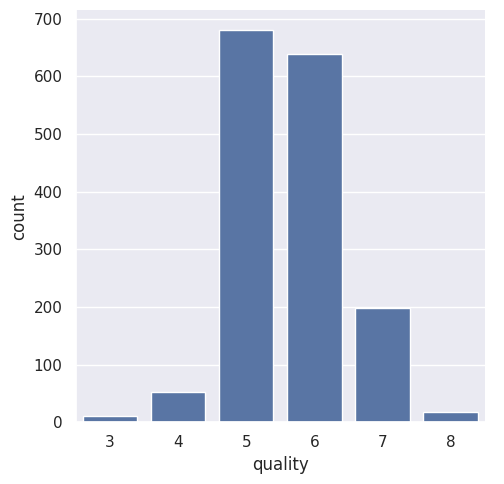

In [12]:
sns.catplot(x='quality', data=wine_data, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

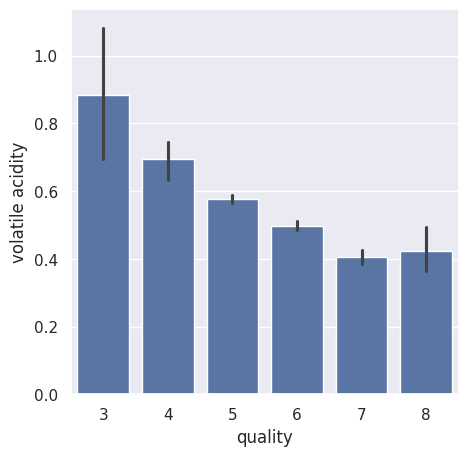

In [13]:
# Volatile Acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='volatile acidity')

<Axes: xlabel='quality', ylabel='citric acid'>

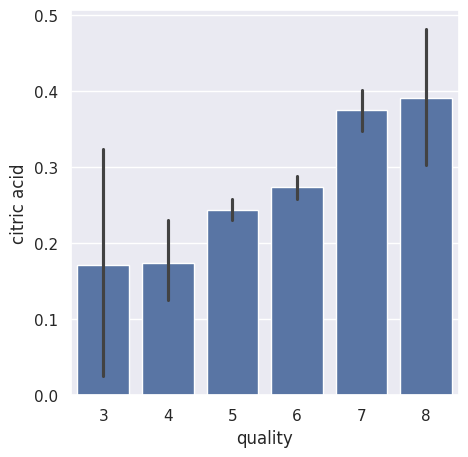

In [14]:
# Citric Acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='citric acid')

<Axes: xlabel='quality', ylabel='fixed acidity'>

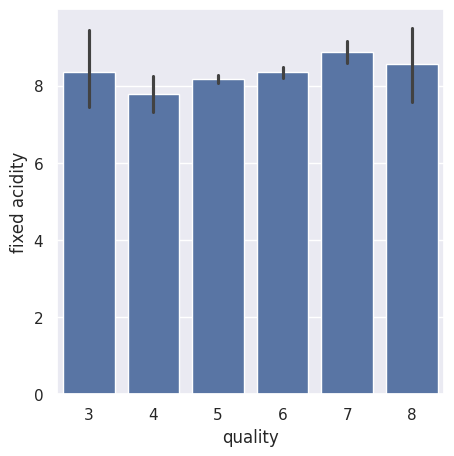

In [16]:
# Fixed Acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='fixed acidity')

<Axes: xlabel='quality', ylabel='residual sugar'>

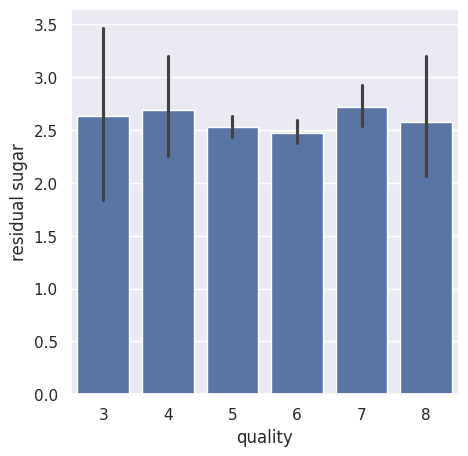

In [17]:
# Residuaal Sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='residual sugar')

<Axes: xlabel='quality', ylabel='chlorides'>

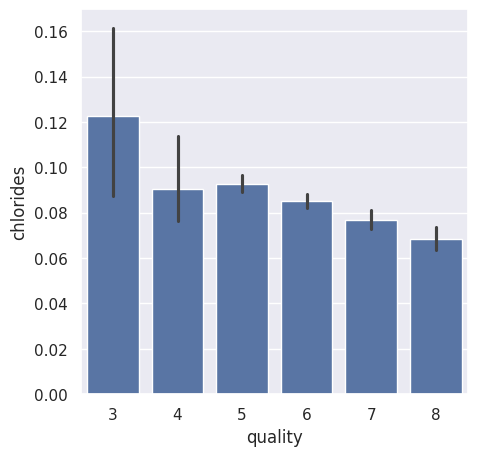

In [18]:
# Chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='chlorides')

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

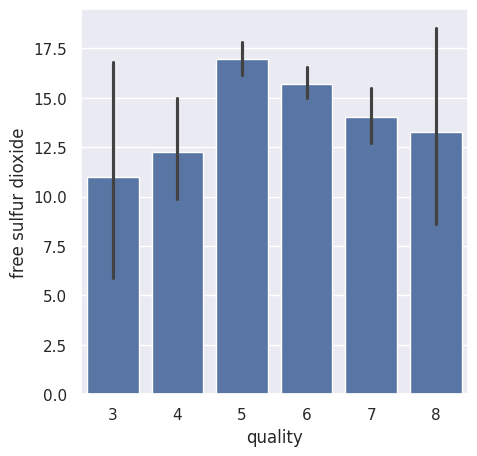

In [19]:
# Free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='free sulfur dioxide')

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

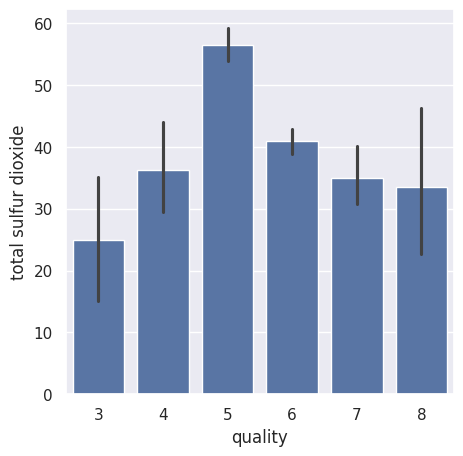

In [20]:
# Total sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='total sulfur dioxide')

<Axes: xlabel='quality', ylabel='density'>

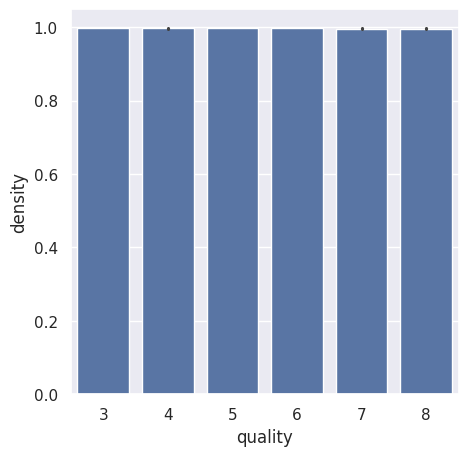

In [21]:
# Density vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='density')

<Axes: xlabel='quality', ylabel='pH'>

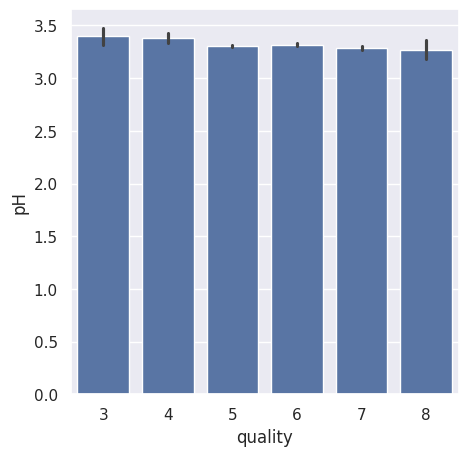

In [22]:
# pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='pH')

<Axes: xlabel='quality', ylabel='sulphates'>

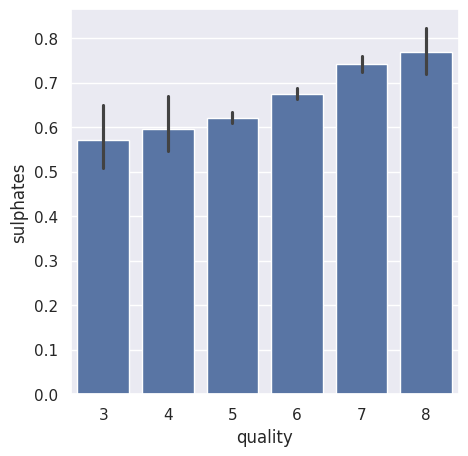

In [23]:
# Sulphates vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='sulphates')

<Axes: xlabel='quality', ylabel='alcohol'>

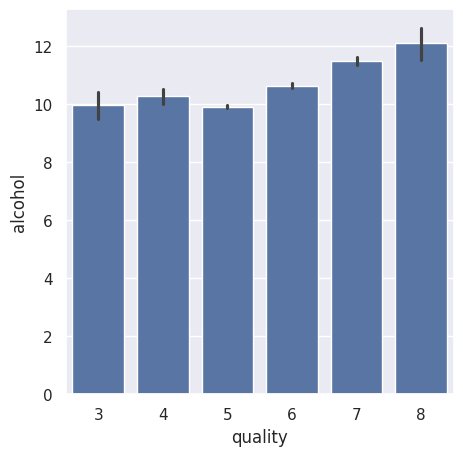

In [24]:
# Alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_data, x='quality', y='alcohol')

**Correlation**

In [26]:
corr = wine_data.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  ...  sulphates   alcohol   quality
fixed acidity              1.000000         -0.256131     0.671703  ...   0.183006 -0.061668  0.124052
volatile acidity          -0.256131          1.000000    -0.552496  ...  -0.260987 -0.202288 -0.390558
citric acid                0.671703         -0.552496     1.000000  ...   0.312770  0.109903  0.226373
residual sugar             0.114777          0.001918     0.143577  ...   0.005527  0.042075  0.013732
chlorides                  0.093705          0.061298     0.203823  ...   0.371260 -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504    -0.060978  ...   0.051658 -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470     0.035533  ...   0.042947 -0.205654 -0.185100
density                    0.668047          0.022026     0.364947  ...   0.148506 -0.496180 -0.174919
pH                        -0.682978          0.234937    -0.541904  ...  

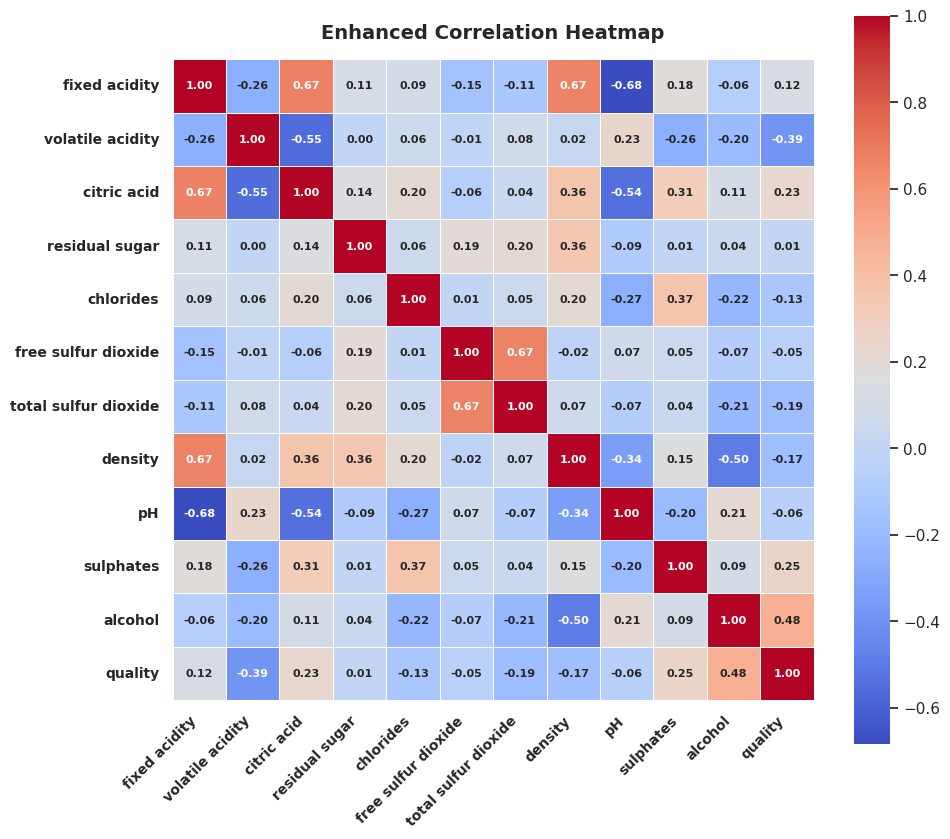

In [28]:
# Create the heatmap with enhancements
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, rotation=45, ha="right", weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()

#**Data Preprocessing**

In [30]:
# Splitting features and target
X = wine_data.drop(columns=['quality'],axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

**Label Binarization**

In [31]:
y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# **Splitting the Dataset into Training and Test Sets**

In [34]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 1599, Training samples: 1199, Test samples: 400


# **Model Training --> Random Forest Classifier**

In [35]:
# Initialize the model
model_rfc = RandomForestClassifier()

In [36]:
# Fit the model on the training data
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

# **Model Evaluation**

In [37]:
# Calculate accuracy on the training data
X_train_pred = model_rfc.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, y_train)
print('Accuracy on training data : ', train_data_accuracy)


Accuracy on training data :  1.0


In [38]:
# Generate and display the confusion matrix on the training data
# The confusion matrix shows the counts of True Positives, True Negatives, False Positives, and False Negatives
conf_matrix = confusion_matrix(y_train, X_train_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1027    0]
 [   0  172]]


In [40]:
# Generate and display the classification report
# The classification report includes precision, recall, F1-score, and support for each class
class_report = classification_report(y_train, X_train_pred, target_names=["Not_Good (0)", "Good (1)"])
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

Not_Good (0)       1.00      1.00      1.00      1027
    Good (1)       1.00      1.00      1.00       172

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [39]:
# accuracy on the test data
X_test_pred = model_rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.91


In [41]:
# Generate and display the confusion matrix on the test data
# The confusion matrix shows the counts of True Positives, True Negatives, False Positives, and False Negatives
conf_matrix = confusion_matrix(y_test, X_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[343  12]
 [ 24  21]]


In [43]:
# Generate and display the classification report
# The classification report includes precision, recall, F1-score, and support for each class
class_report = classification_report(y_test, X_test_pred, target_names=["Not_Good (0)", "Good (1)"])
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

Not_Good (0)       0.93      0.97      0.95       355
    Good (1)       0.64      0.47      0.54        45

    accuracy                           0.91       400
   macro avg       0.79      0.72      0.74       400
weighted avg       0.90      0.91      0.90       400



# **Making a Predictive System**

In [45]:
# Sample input data (new instance to classify)
input_data = [7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4]

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input array for prediction (to match model's expected input shape)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Making a prediction
prediction = model_rfc.predict(input_data_reshaped)
print(prediction)

# Outputting the result
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
# Sample input data (new instance to classify)
input_data = [7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8]

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input array for prediction (to match model's expected input shape)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Making a prediction
prediction = model_rfc.predict(input_data_reshaped)
print(prediction)

# Outputting the result
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
def predict_wine_quality(input_data):
    """
    Predicts wine quality based on input data using the trained RandomForestclassifier model.

    Parameters:
        input_data (list): A list of values corresponding to the features in the order:
                           [fixed acidity, volatile acidity, citric acid, residual sugar,
                           chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,
                           sulphates, alcohol]

    Returns:
        str: Prediction result (Good Quality Wine or Bad Quality Wine).
    """
    # Convert input_data to a NumPy array
    input_array = np.array(input_data).reshape(1, -1)

    # Ensure the model and scaler (if used) are applied to the input
    prediction = model_rfc.predict(input_array)

    # Interpret and return the result
    if prediction[0] == 1:
        return "Good Quality Wine"
    else:
        return "Bad Quality Wine"


In [49]:
# Example: Predict for a new customer
# Sample data: [fixed acidity, volatile acidity, citric acid, residual sugar,
                # chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,
                # sulphates, alcohol]
sample_data = [12.6,0.31,0.72,2.2,0.07,6.0,29.0,0.9987,2.88,0.82,9.8]

# Call the function to predict
result = predict_wine_quality(sample_data)
print("Prediction Result:", result)

Prediction Result: Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
# Define the Gradio interface
import gradio as gr

def gradio_predict(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
                   free_sulfur_dioxide, total_sulfur_dioxide, density, pH,
                   sulphates, alcohol):
    # Convert inputs to a list
    input_data = [
        float(fixed_acidity), float(volatile_acidity), float(citric_acid), float(residual_sugar),
        float(chlorides), float(free_sulfur_dioxide), float(total_sulfur_dioxide), float(density),
        float(pH), float(sulphates), float(alcohol)
    ]

    # Call the prediction function (you need to define predict_wine_quality)
    prediction = predict_wine_quality(input_data)  # Ensure predict_wine_quality is defined
    return prediction

# Set up the Gradio interface
interface = gr.Interface(
    fn=gradio_predict,
    inputs=[
        gr.Number(label="Fixed Acidity"),
        gr.Number(label="Volatile Acidity"),
        gr.Number(label="Citric Acid"),
        gr.Number(label="Residual Sugar"),
        gr.Number(label="Chlorides"),
        gr.Number(label="Free Sulfur Dioxide"),
        gr.Number(label="Total Sulfur Dioxide"),
        gr.Number(label="Density"),
        gr.Number(label="pH"),
        gr.Number(label="Sulphates"),
        gr.Number(label="Alcohol"),
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Wine Quality Prediction",
    description="Enter the required details to predict if a wine will be Good."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://08ae544a2d3cd22e59.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
